# Setup

In [539]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import lru_cache, partial
import math
from collections import namedtuple
from tqdm.auto import tqdm, trange
Point = namedtuple("Point", ['x', 'y'])

ls = os.listdir
join = os.path.join

In [3]:
@lru_cache(256)
def distance(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def view_tsp(solution, points, figsize = (8,8)):
    '''
    List of points
    '''
    plt.figure(figsize=figsize)
    xy = [[points[i].x, points[i].y] for i in solution]
    xy = np.array(xy)
    x = xy[:,0]
    y = xy[:,1]
    plt.plot(x,y,'ok-')
    plt.plot(x[0],y[0],'sr',markersize=12)
    plt.plot(x[-1],y[-1],'*g',markersize=16)
    for i, (xi,yi) in enumerate(xy):
        plt.text(xi+.01,yi+.01,i,fontdict={'fontsize':16,'color':'darkblue'})
        
def to_nearest(points):
    path = []
    remaining = list(range(len(points)))
    path.append(remaining.pop(0))
    while len(remaining)>0:
        dists = [distance(points[i],points[path[-1]]) for i in remaining]
        next_i = np.argmin(dists)
        path.append(remaining.pop(next_i))
        
    return path
            
def loss(sol,points):
    dist = distance(points[sol[-1]],points[sol[0]])
    for i in range(1,len(sol)):
        dist += distance(points[sol[i-1]],points[sol[i]])
        
    return dist

In [4]:
ls('./data')

['tsp_1000_1',
 'tsp_100_1',
 'tsp_100_2',
 'tsp_100_3',
 'tsp_100_4',
 'tsp_100_5',
 'tsp_100_6',
 'tsp_101_1',
 'tsp_105_1',
 'tsp_1060_1',
 'tsp_107_1',
 'tsp_1084_1',
 'tsp_1173_1',
 'tsp_11849_1',
 'tsp_124_1',
 'tsp_127_1',
 'tsp_1291_1',
 'tsp_1304_1',
 'tsp_1323_1',
 'tsp_136_1',
 'tsp_1379_1',
 'tsp_1400_1',
 'tsp_14051_1',
 'tsp_1432_1',
 'tsp_144_1',
 'tsp_150_1',
 'tsp_150_2',
 'tsp_152_1',
 'tsp_1577_1',
 'tsp_159_1',
 'tsp_1655_1',
 'tsp_1748_1',
 'tsp_1817_1',
 'tsp_18512_1',
 'tsp_1889_1',
 'tsp_195_1',
 'tsp_198_1',
 'tsp_200_1',
 'tsp_200_2',
 'tsp_2103_1',
 'tsp_2152_1',
 'tsp_225_1',
 'tsp_226_1',
 'tsp_2319_1',
 'tsp_2392_1',
 'tsp_262_1',
 'tsp_264_1',
 'tsp_299_1',
 'tsp_3038_1',
 'tsp_318_1',
 'tsp_318_2',
 'tsp_33810_1',
 'tsp_3795_1',
 'tsp_400_1',
 'tsp_417_1',
 'tsp_439_1',
 'tsp_442_1',
 'tsp_4461_1',
 'tsp_493_1',
 'tsp_51_1',
 'tsp_574_1',
 'tsp_575_1',
 'tsp_5915_1',
 'tsp_5934_1',
 'tsp_5_1',
 'tsp_654_1',
 'tsp_657_1',
 'tsp_70_1',
 'tsp_724_1',
 'tsp_

In [5]:
with open(join('./data/','tsp_70_1')) as fp:
    content = fp.read().split('\n')

In [6]:
nodeCount = int(content[0])
points = []
for i in range(1, nodeCount+1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

In [6]:
sol=to_nearest(points)
print(sol)
print(loss(sol,points))
view_tsp(sol)

[0, 35, 57, 11, 50, 1, 22, 14, 44, 16, 24, 46, 55, 68, 67, 18, 26, 12, 31, 20, 29, 15, 45, 28, 39, 17, 30, 27, 56, 23, 2, 33, 65, 47, 63, 34, 69, 21, 49, 58, 36, 41, 66, 37, 42, 62, 60, 13, 19, 53, 38, 52, 6, 40, 5, 7, 51, 43, 4, 25, 3, 9, 59, 10, 61, 32, 8, 64, 54, 48]
806.124641709815


TypeError: view_tsp() missing 1 required positional argument: 'points'

In [104]:
with open('./prob_6_nearest.sol') as fp:
    c = fp.read()

In [105]:
c

'78478867.03 0\n0 8 7 6 5 15 14 13 4 33805 33795 33785 33776 33767 33757 33747 33738 33729 33719 33709 33700 33691 33681 33671 33662 33653 33643 33633 33624 33616 33608 33600 33592 33584 33575 33566 33558 33550 33541 33531 33522 33513 33503 33493 33484 33475 33465 33455 33446 33437 33427 33417 33408 33399 33389 33379 33370 33363 33355 33345 33336 33327 33317 33309 33301 33293 33284 33275 33267 33259 33250 33240 33231 33224 33214 33205 33197 33191 32624 33183 33173 33163 33153 33143 33134 33124 33115 33105 33095 33085 33075 33066 33056 33047 33040 33029 33019 33010 33001 32991 32981 32972 32962 32952 32941 32931 32921 32911 32903 32895 32885 32875 32865 32855 32846 32840 32833 32823 32816 32809 32802 32795 32794 32587 32586 32793 32792 32791 32790 32784 32421 32779 32769 32770 32771 32582 32772 32773 32774 32775 32780 32785 32786 32781 32583 32776 32581 32777 32778 32783 32782 32787 32585 32797 32798 32788 1255 32806 32805 32804 32803 32796 32584 32811 32810 32817 32818 32819 32812 3281

# SK OPT

In [14]:
with open(join('./data/','tsp_70_1')) as fp:
    content = fp.read().split('\n')

In [17]:
node_count = int(content[0])
points = []
for i in range(1, nodeCount + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

#Nodes: 70


In [22]:
evaluate = partial(loss,points=points)

In [38]:
from sko import GA

In [44]:
optim = GA.GA_TSP(
    evaluate,
    node_count,
    size_pop=200,
    max_iter=1000,
)

In [45]:
solution, value = optim.run()

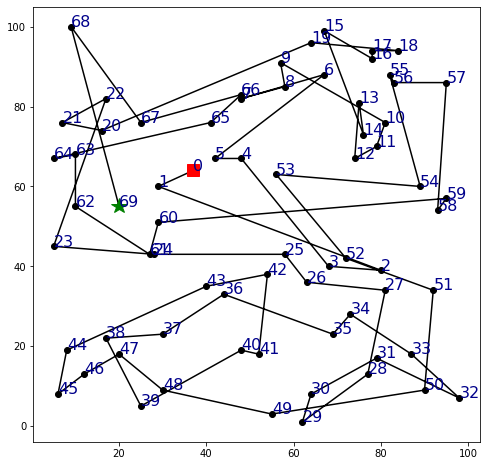

In [46]:
view_tsp(solution)

# 2-opt

In [156]:
with open(join('./data/','tsp_76_1')) as fp:
    content = fp.read().split('\n')

In [157]:
node_count = int(content[0])
points = []
for i in range(1, nodeCount + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

#Nodes: 76


In [158]:
evaluate = partial(loss,points=points)

In [173]:
def cost_change(n1, n2, n3, n4):
    return (distance(n1, n3) + 
            distance(n2, n4) - 
            distance(n1, n2) -
            distance(n4, n3))


def two_opt(route,points,max_iter = 1000):
    best = route.copy()
    improved = True
    counter = 0
#     pbar = trange(max_iter)
    while improved and counter<max_iter:
        counter += 1
        value = evaluate(route)
        print(f'#{counter:04.0f} \t{value}',flush = True)
        improved = False
        for i in range(1, len(route) - 2):
                
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                if cost_change(
                        points[best[i - 1]],
                        points[best[i]],
                        points[best[j - 1]],
                        points[best[j]],
                ) < 0:
                    best[i:j] = best[j - 1:i - 1:-1]
                    improved = True
        route = best
    return best

In [165]:
# Initial solution using greedy
sol=to_nearest(points)
evaluate(sol)

663.9128870389574

In [166]:
from collections import deque

In [167]:
sol2 = two_opt(sol)

#0001 	663.9128870389574
#0002 	604.1017132364877
#0003 	581.9961795816123


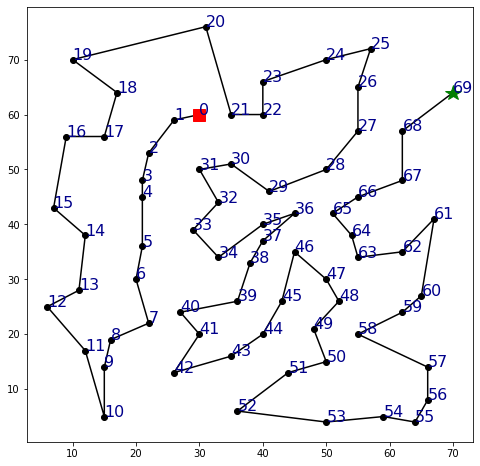

In [168]:
view_tsp(sol2)

# CP

In [103]:
from solver import view_tsp

In [67]:
with open(join('./data/','tsp_70_1')) as fp:
    content = fp.read().split('\n')

In [68]:
node_count = int(content[0])
points = []
for i in range(1, node_count + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

#Nodes: 70


In [69]:
from ortools.sat.python import cp_model

In [128]:
model = cp_model.CpModel()

In [129]:
a = [] # whether i and j are connected
u = [] # order of oints
for i in range(node_count):
    row = [model.NewBoolVar(f'a_{i}_{j}') for j in range(node_count)]
    a.append(row)
# u = [model.NewIntVar(1,node_count-1,f'u_{i}') for i in range(node_count)]

In [130]:
# Add Constraints
for i in range(node_count):
    model.Add(a[i][i] == 0)
    model.Add(sum([ a[i][j] for j in range(node_count)])==1)
    model.Add(sum([ a[j][i] for j in range(node_count)])==1)
    
# model.AddAllDifferent(u)

# for i in range(1,node_count):
#     for j in range(1,node_count):
#         if i==j: continue
#         model.Add(u[i]-u[j]+node_count*a[i][j]<=node_count-1)
# model.Add(u[0]==0)
# model.Add(u[-1]==node_count)

In [131]:
# Objective
obj = []
for i in range(node_count):
    for j in range(node_count):
        d = distance(points[i],points[j])*100
        obj.append(int(d)*a[i][j])
model.Minimize(sum(obj))

In [132]:
cpsolver = cp_model.CpSolver()
cpsolver.parameters.max_time_in_seconds = 60.0
status = cpsolver.Solve(model)

In [133]:
STATUS = {
    cp_model.FEASIBLE: 'FEASIBLE',
    cp_model.UNKNOWN: 'UNKNOWN',
    cp_model.MODEL_INVALID: 'MODEL_INVALID',
    cp_model.INFEASIBLE: 'INFEASIBLE',
    cp_model.OPTIMAL: 'OPTIMAL',
}
STATUS[status]

'FEASIBLE'

In [134]:
sol_mat = []
for i in range(node_count):
    row = [cpsolver.Value(a[i][j]) for j in range(node_count)]
    sol_mat.append(row)
    print(row)
    
sol_mat = np.array(sol_mat)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [135]:
np.argmax(sol_mat,axis=0)

array([ 2, 22, 13, 32, 29, 67, 57, 45, 43,  5,  8, 21, 25, 54, 35, 46,  3,
       42, 63, 64, 66, 30, 39, 11, 51,  7, 56, 10, 34, 55, 40, 65, 12, 38,
       49, 48, 52, 31, 24, 17, 58, 14, 36, 60, 16, 59, 37,  1, 15,  4, 28,
       61, 19, 62, 20, 27, 53,  0, 23, 26, 18,  9, 33, 47, 68, 69, 50,  6,
       41, 44], dtype=int64)

In [136]:
def view_matrix(mat,points,figsize = (8,8)):
    lines = []
#     row = np.argmax(sol_mat,axis=0)
    row = np.arange(len(points))
    col = np.argmax(sol_mat,axis=1)
    plt.figure(figsize=figsize)
    for i,j in zip(row,col):
        x = [points[i].x,points[j].x]
        y = [points[i].y,points[j].y]
        plt.plot(x,y,'ok-')

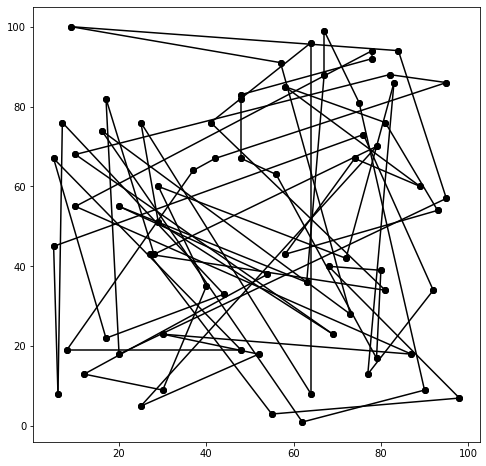

In [137]:
view_matrix(sol_mat,points)

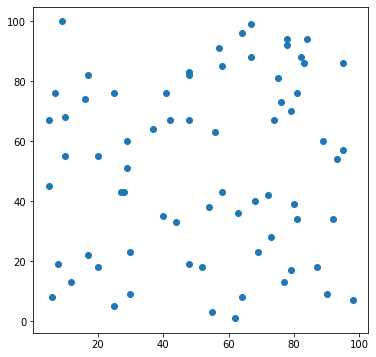

In [119]:
plt.figure(figsize=(6, 6))
plt.scatter(
    x=[p.x for p in points],
    y=[p.y for p in points],
)

# Randomized Opt-2

In [175]:
np.random.permutation(12)

array([ 2,  0,  5,  9,  1, 11,  4,  8,  7,  6,  3, 10])

In [191]:
def randomized_opt2(points,restarts = 1):
    if restarts>1:
        solutions = []
        values = []
        for i in range(restarts):
            print(f'<<< Attempt {i+1}/{restarts}>>>')
            solution = randomized_opt2(points)
            value = loss(solution,points)
            solutions.append(solution)
            values.append(value)
        idx = np.argmin(values)
        return solutions[idx]
    else:
        trial1 = np.random.permutation(len(points))
        np.random.shuffle(trial1)
        solution = two_opt(trial1,points)
        trial2 = deque(solution)
        trial2.rotate(3)
        return two_opt(list(trial2),points)

In [194]:
res = randomized_opt2(points,10)

<<< Attempt 1/10>>>
#0001 	2426.4538435986424
#0002 	818.3901689304282
#0003 	633.7244551270738
#0004 	594.2899666692083
#0005 	593.4844417059912
#0001 	593.4844417059912
#0002 	556.4790461867753
#0003 	556.4637064649107
<<< Attempt 2/10>>>
#0001 	2300.1823901781795
#0002 	763.3075407666126
#0003 	591.3046868301706
#0004 	569.4607267637766
#0005 	568.3845129904728
#0006 	565.6931186028605
#0001 	565.6931186028607
#0002 	565.1208280157773
<<< Attempt 3/10>>>
#0001 	2457.6338127777603
#0002 	720.5787300069944
#0003 	631.2935500976675
#0004 	586.6487736390486
#0005 	582.4422463027072
#0001 	582.4422463027073
#0002 	568.5130219770506
#0003 	568.040836581226
#0004 	568.0203550569792
#0005 	561.053970251728
<<< Attempt 4/10>>>
#0001 	2378.614802169817
#0002 	751.6926066710616
#0003 	644.8225625537841
#0004 	615.3676848309233
#0005 	606.8942120864522
#0006 	603.1148206299547
#0001 	603.1148206299547
#0002 	587.7743522824306
#0003 	571.1847785972349
#0004 	571.1627795305491
<<< Attempt 5/10>>>

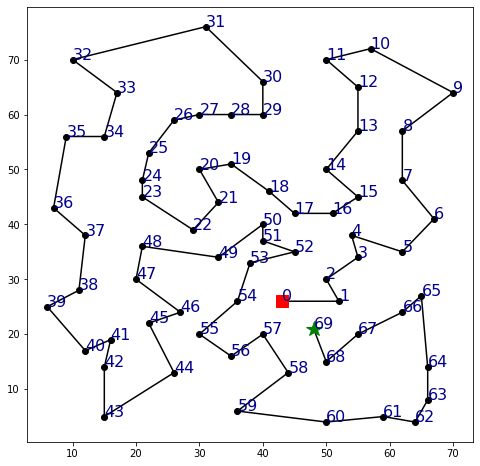

In [190]:
view_tsp(res)

# OR-tool routing solver

In [31]:
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [69]:
def create_data_model(points):
    """Stores the data for the problem."""
    data = {}
    data['locations'] = points
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = (int(
                    math.hypot((from_node[0] - to_node[0]),
                               (from_node[1] - to_node[1]))))
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {}'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Objective: {}m\n'.format(route_distance)
    return plan_output


In [87]:
def get_route(manager, routing, solution):
    route=[]
    route =[ routing.Start(0)]
    while not routing.IsEnd(route[-1]):
        index = route[-1]
        new_index = solution.Value(routing.NextVar(index))
        route.append(new_index)
    route.pop(-1)
    return route

def main(points = None):
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model(locations = points)

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['locations']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    distance_matrix = compute_euclidean_distance_matrix(data['locations'])

    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return distance_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
#         out = print_solution(manager, routing, solution)
        out = get_route(manager, routing, solution)
        
    return out
        



In [88]:
o = main(points)

In [92]:
o

[0,
 57,
 11,
 22,
 1,
 14,
 16,
 44,
 39,
 17,
 30,
 27,
 56,
 23,
 2,
 33,
 65,
 47,
 63,
 34,
 69,
 21,
 49,
 58,
 53,
 19,
 13,
 60,
 42,
 62,
 37,
 66,
 41,
 36,
 38,
 52,
 6,
 40,
 5,
 7,
 51,
 32,
 8,
 48,
 54,
 64,
 61,
 10,
 59,
 9,
 3,
 25,
 4,
 43,
 55,
 68,
 46,
 24,
 67,
 26,
 18,
 12,
 31,
 45,
 20,
 15,
 29,
 28,
 50,
 35]

In [91]:
loss(o,points)

714.2072130080118

In [59]:
with open(join('./data/','tsp_70_1')) as fp:
    content = fp.read().split('\n')

In [60]:
node_count = int(content[0])
points = []
for i in range(1, node_count + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

#Nodes: 70


In [63]:
manager = pywrapcp.RoutingIndexManager(node_count, 1, 0)
routing = pywrapcp.RoutingModel(manager)
distance_callback = lambda i,j: distance(points[i],points[j])
transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
# search_parameters.first_solution_strategy = (
#     routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

solution = routing.SolveWithParameters(search_parameters)

In [64]:
if solution:
    out=print_solution(manager, routing, solution)

Objective: 0
Route:
 0 -> 69 -> 68 -> 67 -> 66 -> 65 -> 64 -> 63 -> 62 -> 61 -> 60 -> 59 -> 58 -> 57 -> 56 -> 55 -> 54 -> 53 -> 52 -> 51 -> 50 -> 49 -> 48 -> 47 -> 46 -> 45 -> 44 -> 43 -> 42 -> 41 -> 40 -> 39 -> 38 -> 37 -> 36 -> 35 -> 34 -> 33 -> 32 -> 31 -> 30 -> 29 -> 28 -> 27 -> 26 -> 25 -> 24 -> 23 -> 22 -> 21 -> 20 -> 19 -> 18 -> 17 -> 16 -> 15 -> 14 -> 13 -> 12 -> 11 -> 10 -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0



In [48]:
route=get_route(manager, routing, solution)

In [49]:
route

[0,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 70]

# MILP

## Miller–Tucker–Zemlin formulation

In [7]:
import os
from ortools.linear_solver import pywraplp 

In [8]:
print(*ls('./data'),sep='\t')

tsp_1000_1	tsp_100_1	tsp_100_2	tsp_100_3	tsp_100_4	tsp_100_5	tsp_100_6	tsp_101_1	tsp_105_1	tsp_1060_1	tsp_107_1	tsp_1084_1	tsp_1173_1	tsp_11849_1	tsp_124_1	tsp_127_1	tsp_1291_1	tsp_1304_1	tsp_1323_1	tsp_136_1	tsp_1379_1	tsp_1400_1	tsp_14051_1	tsp_1432_1	tsp_144_1	tsp_150_1	tsp_150_2	tsp_152_1	tsp_1577_1	tsp_159_1	tsp_1655_1	tsp_1748_1	tsp_1817_1	tsp_18512_1	tsp_1889_1	tsp_195_1	tsp_198_1	tsp_200_1	tsp_200_2	tsp_2103_1	tsp_2152_1	tsp_225_1	tsp_226_1	tsp_2319_1	tsp_2392_1	tsp_262_1	tsp_264_1	tsp_299_1	tsp_3038_1	tsp_318_1	tsp_318_2	tsp_33810_1	tsp_3795_1	tsp_400_1	tsp_417_1	tsp_439_1	tsp_442_1	tsp_4461_1	tsp_493_1	tsp_51_1	tsp_574_1	tsp_575_1	tsp_5915_1	tsp_5934_1	tsp_5_1	tsp_654_1	tsp_657_1	tsp_70_1	tsp_724_1	tsp_7397_1	tsp_76_1	tsp_76_2	tsp_783_1	tsp_85900_1	tsp_9432_1	tsp_99_1


In [9]:
with open('./data/tsp_51_1') as fp:
    content = fp.read().split('\n')

In [10]:
node_count = int(content[0])
points = []
for i in range(1, node_count + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

d = []
for i in range(node_count):
    row =[distance(points[i],points[j]) for j in range(node_count)]
    d.append(row)
    
np.shape(d)

#Nodes: 51


(51, 51)

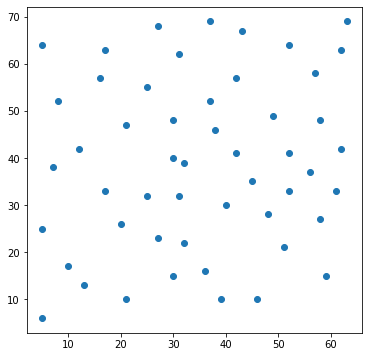

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(
    x=[p.x for p in points],
    y=[p.y for p in points],
)

In [54]:
solver = pywraplp.Solver.CreateSolver('TSP1','SCIP')

### Variables

In [61]:
# Edges
x = [[solver.BoolVar(f'x_{i}_{j}') for j in range(node_count)]
     for i in range(node_count)]

In [62]:
# Order Visitied
# u = [0]+[solver.IntVar(1,node_count-1,f'u_{i}') for i in range(1,node_count)]

### Constraints

In [63]:
for i in range(node_count):
    # x_i_i == 0
    solver.Add(x[i][i]==0)
    
    # Row sum == 1
    solver.Add(sum([x[i][j] for j in range(node_count)])==1)
    
    # Column sum == 1
    solver.Add(sum([x[j][i] for j in range(node_count)])==1)

# for i in range(1,node_count):
#     for j in range(1,node_count):
#         if i==j: continue
#         # No subtour
#         solver.Add(u[i]-u[j]+node_count*x[i][j]<=node_count-1)
    

### Objective

In [64]:
obj = 0
for i in range(node_count):
    for j in range(node_count):
        obj += d[i][j]*x[i][j]

solver.Minimize(obj)

### Solve

In [65]:
STATUS = {
    pywraplp.Solver.FEASIBLE: 'FEASIBLE',
    pywraplp.Solver.UNBOUNDED: 'UNBOUNDED',
    pywraplp.Solver.BASIC: 'BASIC',
    pywraplp.Solver.INFEASIBLE: 'INFEASIBLE',
    pywraplp.Solver.NOT_SOLVED: 'NOT_SOLVED',
    pywraplp.Solver.OPTIMAL: 'OPTIMAL',
}
solver.SetTimeLimit(60000)

In [66]:
status = solver.Solve()
STATUS[status]

'NOT_SOLVED'

In [69]:
for i in range(node_count):
    print([x[i][j].solution_value() for j in range(node_count)])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

# Local Search - Node Adjustment


In [40]:
import os
from solver import randomized_opt2, view_tsp,local_search,two_opt_v2

In [8]:
print(*ls('./data'),sep='\t')

tsp_1000_1	tsp_100_1	tsp_100_2	tsp_100_3	tsp_100_4	tsp_100_5	tsp_100_6	tsp_101_1	tsp_105_1	tsp_1060_1	tsp_107_1	tsp_1084_1	tsp_1173_1	tsp_11849_1	tsp_124_1	tsp_127_1	tsp_1291_1	tsp_1304_1	tsp_1323_1	tsp_136_1	tsp_1379_1	tsp_1400_1	tsp_14051_1	tsp_1432_1	tsp_144_1	tsp_150_1	tsp_150_2	tsp_152_1	tsp_1577_1	tsp_159_1	tsp_1655_1	tsp_1748_1	tsp_1817_1	tsp_18512_1	tsp_1889_1	tsp_195_1	tsp_198_1	tsp_200_1	tsp_200_2	tsp_2103_1	tsp_2152_1	tsp_225_1	tsp_226_1	tsp_2319_1	tsp_2392_1	tsp_262_1	tsp_264_1	tsp_299_1	tsp_3038_1	tsp_318_1	tsp_318_2	tsp_33810_1	tsp_3795_1	tsp_400_1	tsp_417_1	tsp_439_1	tsp_442_1	tsp_4461_1	tsp_493_1	tsp_51_1	tsp_574_1	tsp_575_1	tsp_5915_1	tsp_5934_1	tsp_5_1	tsp_654_1	tsp_657_1	tsp_70_1	tsp_724_1	tsp_7397_1	tsp_76_1	tsp_76_2	tsp_783_1	tsp_85900_1	tsp_9432_1	tsp_99_1


In [60]:
with open('./data/tsp_100_3') as fp:
    content = fp.read().split('\n')

In [61]:
node_count = int(content[0])
points = []
for i in range(1, node_count + 1):
    line = content[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

print(f'#Nodes: {node_count}')

d = []
for i in range(node_count):
    row =[distance(points[i],points[j]) for j in range(node_count)]
    d.append(row)
    
np.shape(d)

#Nodes: 100


(100, 100)

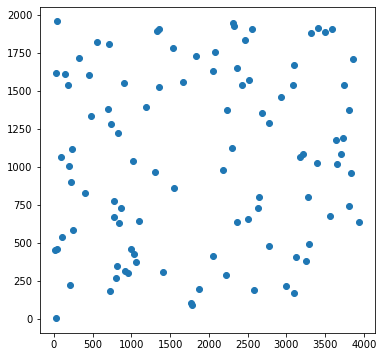

In [62]:
plt.figure(figsize=(6, 6))
plt.scatter(
    x=[p.x for p in points],
    y=[p.y for p in points],
)

In [63]:
sol = randomized_opt2(points,5)

<<< Attempt 1/5>>>
#0001 	177969.8860666144
#0002 	34906.65224394975
#0003 	27968.202360357587
#0004 	24453.514031832896
#0005 	23518.051418021543
#0001 	23518.051418021547
#0002 	22979.92974740138
#0003 	22819.36963430183
#0004 	22758.476647125106
#0005 	22737.574726998726
<<< Attempt 2/5>>>
#0001 	167528.91924707362
#0002 	33197.83554959991
#0003 	28278.202157967513
#0004 	25981.572876824368
#0005 	25125.965441478278
#0006 	25078.29002034301
#0001 	25078.290020343014
#0002 	23046.05161972885
<<< Attempt 3/5>>>
#0001 	174726.56809595964
#0002 	31338.571102965114
#0003 	26959.072822392165
#0004 	23756.34648494398
#0005 	23587.942863657237
#0006 	23238.03281586532
#0007 	23213.031297662823
#0001 	23213.031297662823
#0002 	22650.991428572805
#0003 	22221.63915712227
<<< Attempt 4/5>>>
#0001 	174733.39293906075
#0002 	33662.20284845377
#0003 	27286.12040112319
#0004 	25304.250392487633
#0005 	24199.659994028847
#0006 	23994.17754150274
#0007 	23630.226743547297
#0001 	23630.226743547297
<

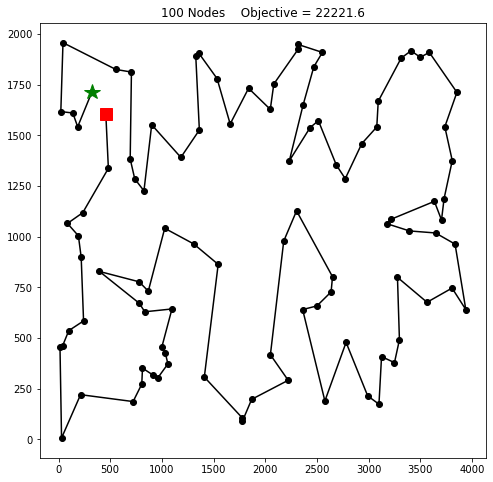

In [64]:
view_tsp(sol,points)

In [65]:
sol2 = local_search(sol,points)

	* local search: Iteration #1
	22221.64 --> 22043.04
	22043.04 --> 21995.18
	21995.18 --> 21932.82
	21932.82 --> 21831.30
	21831.30 --> 21831.30
	* local search: Iteration #2
	21831.30 --> 21818.22
	21818.22 --> 21651.06
	21651.06 --> 21464.71
	* local search: Iteration #3
	21464.71 --> 21428.57
	* local search: Iteration #4
No improvement observed.


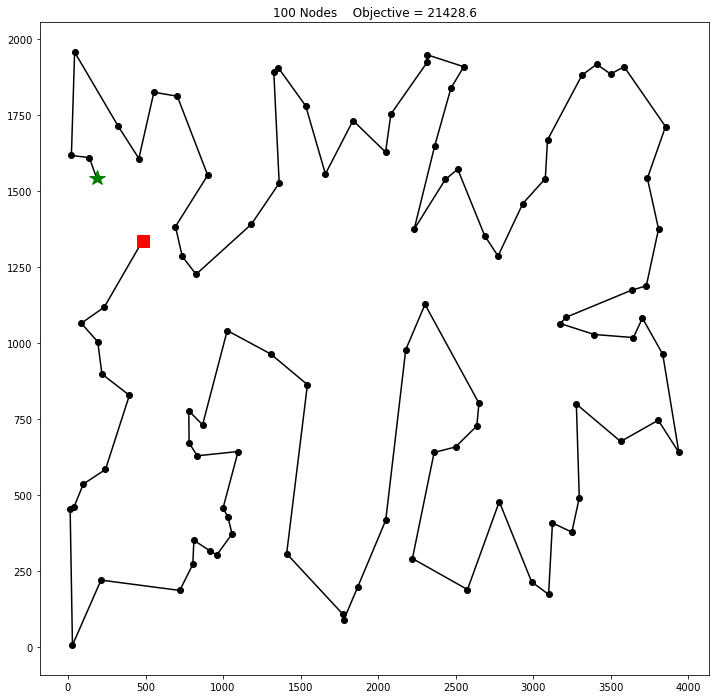

In [66]:
view_tsp(sol2,points,(12,12))

# Dynamic Greedy

In [191]:
import random
from solver import load_data, two_opt_v2, local_search
from tqdm.auto import trange

In [212]:
def dynamic_greedy(points,trials = 1,shuffle=False, random_state=None):
    assert isinstance(trials,int) and trials>0, 'Invalid number for trials.'
    random.seed(random_state)
    if trials>1:
        routes = []
        values = []
        for i in trange(trials):
            seed = random.randint(0,10000)
            route = dynamic_greedy(
                points,trials = 1,
                shuffle=True, 
                random_state=seed,
            )
            values.append(loss(route,points))
            routes.append(route)
        idx = np.argmin(values)
        print(*enumerate(values),sep='\n')
        return routes[idx]
    
    unused = points.copy()
    random.shuffle(unused)
    sol = []
    sol.append(unused.pop(0))
    sol.append(unused.pop(0))
    obj = loss(range(len(sol)),sol)
    while len(unused)>0:
        point = unused.pop(0)
        values = []
        for i in range(len(sol)):
            new_sol = sol.copy()
            new_sol.insert(i,point)
            values.append(loss(range(len(new_sol)),new_sol))
        idx = np.argmin(values)
        sol.insert(idx,point)
    route = [points.index(p) for p in sol]
    return route



In [203]:
node_count,points = load_data('tsp_100_3')

#Nodes: 100


In [213]:
sol = dynamic_greedy(points,20)


(0, 22276.511125209006)
(1, 22901.658731650703)
(2, 22065.65039048323)
(3, 24423.670445299376)
(4, 23443.45666837663)
(5, 22056.759790871896)
(6, 22572.459105574824)
(7, 21630.696955028452)
(8, 21691.349531453518)
(9, 22461.96853122196)
(10, 22565.50106963874)
(11, 23510.89260289728)
(12, 22787.740598606622)
(13, 22211.132299787245)
(14, 22433.754510040413)
(15, 23171.18576534516)
(16, 21800.10961510372)
(17, 22067.35691594889)
(18, 22135.735705503226)
(19, 22333.228583585427)


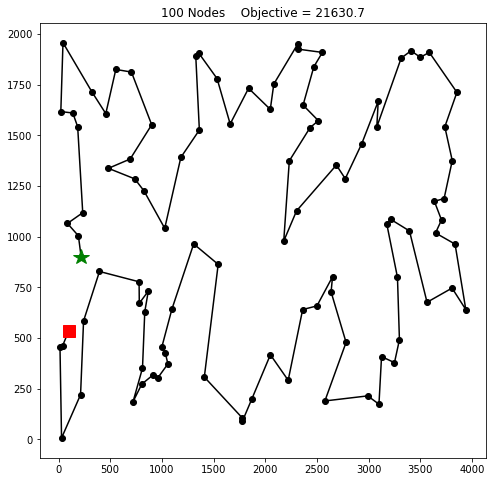

In [214]:
view_tsp(sol,points)

#0001 	21630.696955028452
#0002 	21381.327800088937


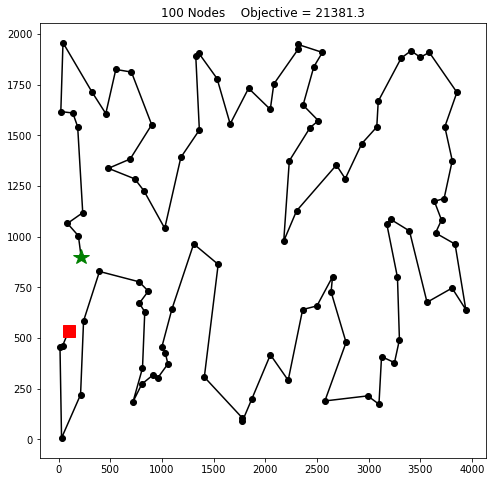

In [215]:
sol2 = two_opt_v2(sol,points)
view_tsp(sol2,points)

	* local search: Iteration #1
	21381.33 --> 21381.33
	21381.33 --> 21277.46
	* local search: Iteration #2
No improvement observed.


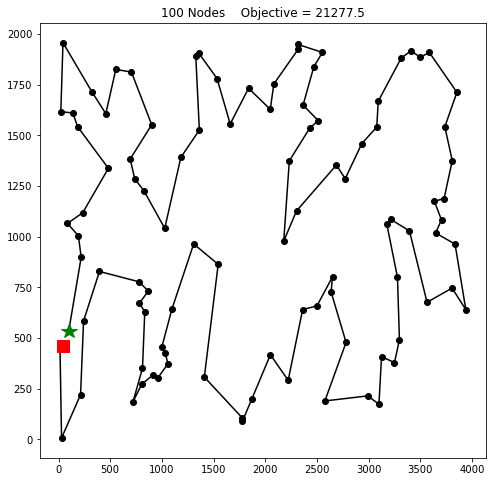

In [216]:
sol3 = local_search(sol2,points)
view_tsp(sol3,points)

In [208]:
solrnd = randomized_opt2(points,200)

<<< Attempt 1/200>>>
#0001 	169483.69095013518
#0002 	32703.584450097656
#0003 	26334.1337409997
#0004 	24320.980798644287
#0005 	24077.1552879755
#0006 	23804.04834551562
#0001 	23804.04834551562
#0002 	22847.36151847998
#0003 	22836.882469837015
#0004 	22819.90227100699
<<< Attempt 2/200>>>
#0001 	152169.71186105692
#0002 	31068.67975868043
#0003 	25322.64309031191
#0004 	23694.267474493157
#0005 	23422.050362578375
#0006 	23360.710627362412
#0007 	23313.035206227145
#0001 	23313.035206227145
#0002 	23151.004516297802
<<< Attempt 3/200>>>
#0001 	171654.22976294233
#0002 	35459.4927526889
#0003 	29091.38898423051
#0004 	25840.63010449592
#0005 	24536.592700022244
#0006 	24328.871306911846
#0001 	24328.871306911842
#0002 	23362.909842781537
#0003 	23082.476953708323
#0004 	22994.532047559154
#0005 	22939.59951722805
<<< Attempt 4/200>>>
#0001 	163590.31150422487
#0002 	33027.48340159071
#0003 	27207.567270294116
#0004 	26191.813120232728
#0005 	25505.096923415906
#0006 	25500.514791774

#0003 	23171.32582101771
#0004 	23002.87968141945
<<< Attempt 32/200>>>
#0001 	167232.4703346874
#0002 	31339.537508855145
#0003 	28031.746697846727
#0004 	24915.53664373693
#0005 	23923.987367542795
#0006 	23859.17181959375
#0001 	23859.171819593754
#0002 	23450.054028512553
#0003 	23443.975613454157
<<< Attempt 33/200>>>
#0001 	161601.28295951278
#0002 	34086.17735664208
#0003 	28530.884394916808
#0004 	26057.19815388756
#0005 	25172.45685832989
#0006 	24773.107670222424
#0007 	24715.852165067394
#0001 	24715.85216506739
#0002 	23002.881572349288
#0003 	22481.886803790872
#0004 	22360.728371924943
#0005 	22206.923469488276
<<< Attempt 34/200>>>
#0001 	156461.04734105925
#0002 	31542.868333302595
#0003 	25592.898129535402
#0004 	23886.367480293142
#0005 	23612.716527411183
#0006 	23527.645026274062
#0001 	23527.64502627406
#0002 	23050.847778326814
#0003 	22959.643449535568
<<< Attempt 35/200>>>
#0001 	160934.69800576966
#0002 	30214.53773345544
#0003 	26055.930842324546
#0004 	22704.

#0003 	22317.29283657065
<<< Attempt 62/200>>>
#0001 	171536.96311023354
#0002 	33287.11465712129
#0003 	26311.608986645286
#0004 	24333.794792229994
#0005 	23379.327459180888
#0006 	23377.933612115536
#0001 	23377.933612115532
#0002 	22725.036838992408
<<< Attempt 63/200>>>
#0001 	166778.40762352388
#0002 	34114.72816063775
#0003 	26870.00370539321
#0004 	24595.690380493746
#0005 	24340.279693320284
#0006 	24155.82541286793
#0007 	24083.531021600647
#0001 	24083.531021600644
#0002 	23698.60647838249
#0003 	23403.904017988993
#0004 	23338.86523539589
<<< Attempt 64/200>>>
#0001 	175291.87002544256
#0002 	34367.763062952916
#0003 	27769.574335699923
#0004 	26409.581802172204
#0005 	25627.386975861893
#0006 	25621.07502813113
#0001 	25621.075028131138
#0002 	23007.084721487423
#0003 	22150.168263499494
#0004 	21716.104121948098
#0005 	21684.758055401264
<<< Attempt 65/200>>>
#0001 	165578.7423832428
#0002 	34377.602858583276
#0003 	27464.398789341616
#0004 	26572.657920971164
#0005 	2602

#0002 	33652.05621404107
#0003 	27600.58957598121
#0004 	25424.0071219088
#0005 	24529.509361709104
#0001 	24529.509361709108
#0002 	23226.514189584595
#0003 	23157.74925795568
#0004 	23054.38733690274
<<< Attempt 94/200>>>
#0001 	191904.3920493417
#0002 	31931.581393026965
#0003 	25536.02193689558
#0004 	24000.739402343326
#0005 	23195.265630433427
#0001 	23195.265630433427
<<< Attempt 95/200>>>
#0001 	164083.41307213597
#0002 	32123.86226102499
#0003 	26161.46965976944
#0004 	24333.233943402407
#0005 	23354.75073978215
#0001 	23354.750739782157
#0002 	22625.6410127626
#0003 	22457.194873164342
<<< Attempt 96/200>>>
#0001 	170706.35376191867
#0002 	32158.930525942615
#0003 	26843.624232194197
#0004 	23710.61185892203
#0005 	22910.660395304716
#0006 	22788.69850065009
#0007 	22612.190195700965
#0001 	22612.190195700965
#0002 	22009.95486010197
#0003 	21607.30775954505
<<< Attempt 97/200>>>
#0001 	157767.8357822266
#0002 	30977.622966189996
#0003 	25969.878252756644
#0004 	24442.3230061

#0002 	32858.070905912224
#0003 	26578.52051743232
#0004 	23827.24344059977
#0005 	23335.800417772218
#0006 	22654.42240682267
#0007 	22590.607612958203
#0008 	22219.06754932104
#0001 	22219.067549321036
#0002 	21749.309136044594
<<< Attempt 127/200>>>
#0001 	178408.71754342061
#0002 	32116.205293585666
#0003 	25955.793243627755
#0004 	25213.928363316183
#0005 	24391.123459718503
#0006 	24307.722984801898
#0001 	24307.722984801894
#0002 	23220.973949314026
#0003 	23210.71666443985
<<< Attempt 128/200>>>
#0001 	180485.28850097503
#0002 	33647.43202506378
#0003 	26918.51451569666
#0004 	23878.534172866577
#0005 	22855.33407635572
#0001 	22855.33407635572
#0002 	22673.523316972518
<<< Attempt 129/200>>>
#0001 	173863.79364949316
#0002 	33223.143830271285
#0003 	28122.41578409031
#0004 	25107.749242190046
#0005 	24793.508820989133
#0001 	24793.508820989136
#0002 	24164.753556659824
<<< Attempt 130/200>>>
#0001 	162115.13231859027
#0002 	33144.348903465834
#0003 	27964.971193392514
#0004 	2

#0002 	22883.12229643599
#0003 	22557.230595343077
<<< Attempt 159/200>>>
#0001 	166919.6202520493
#0002 	35638.36384348555
#0003 	29058.685409811224
#0004 	27169.253126311636
#0005 	26704.506129648926
#0006 	26258.09968595875
#0001 	26258.099685958747
#0002 	24899.69511293106
#0003 	23809.993186740907
#0004 	22533.735205460962
#0005 	21998.52581674221
#0006 	21987.77380345536
#0007 	21972.161585489077
#0008 	21924.48616435381
<<< Attempt 160/200>>>
#0001 	167746.7850345462
#0002 	33457.66145296932
#0003 	28645.153192611047
#0004 	27175.24375157485
#0005 	25967.03834769266
#0006 	25641.76843240929
#0007 	25432.93302747637
#0001 	25432.933027476374
#0002 	23849.802719862666
#0003 	23801.28006974266
<<< Attempt 161/200>>>
#0001 	175360.39138309643
#0002 	31934.303632271403
#0003 	24451.17534464348
#0004 	23670.625365259526
#0001 	23670.625365259522
<<< Attempt 162/200>>>
#0001 	174149.2473409919
#0002 	29972.56862763093
#0003 	24638.348432185183
#0004 	23256.858304383222
#0001 	23256.858

#0002 	30925.857766137597
#0003 	26236.09919404549
#0004 	24720.049585812332
#0005 	23505.89284455889
#0001 	23505.892844558886
#0002 	23231.1843684811
#0003 	23182.9573215765
#0004 	22927.950528422207
<<< Attempt 192/200>>>
#0001 	157406.19534360326
#0002 	31534.901929953554
#0003 	25793.16820161725
#0004 	23197.238801092783
#0005 	22035.979235511193
#0006 	21849.592424576647
#0007 	21801.91700344138
#0001 	21801.917003441376
#0002 	21788.796291896833
#0003 	21787.70733312305
<<< Attempt 193/200>>>
#0001 	170356.6743636251
#0002 	31784.262683925816
#0003 	26743.107507841756
#0004 	24682.597138712015
#0005 	24455.346799706742
#0001 	24455.346799706742
#0002 	23904.287410154695
<<< Attempt 194/200>>>
#0001 	176068.77097042065
#0002 	32643.209338222583
#0003 	26202.0159448342
#0004 	23901.540714538733
#0005 	22831.393437328625
#0001 	22831.393437328617
#0002 	21853.56354390019
<<< Attempt 195/200>>>
#0001 	163972.61955843348
#0002 	30505.190342846974
#0003 	25601.707968756793
#0004 	2412

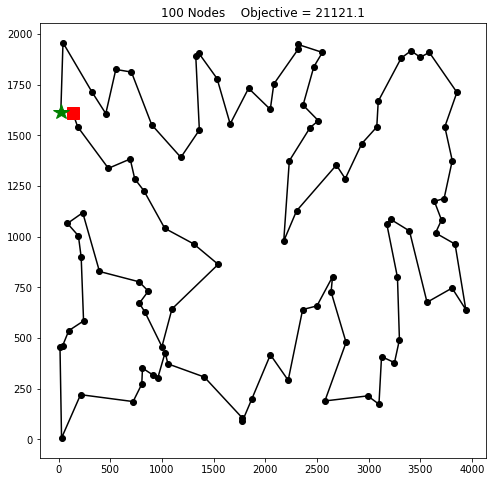

In [209]:
view_tsp(solrnd,points)

	* local search: Iteration #1
	21121.15 --> 20993.51
	20993.51 --> 20983.13
	* local search: Iteration #2
No improvement observed.


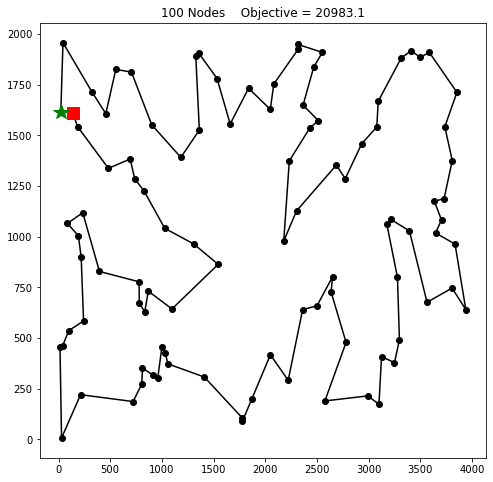

In [210]:
solrnd3 = local_search(solrnd,points)
view_tsp(solrnd3,points)

# 3-opt

In [221]:
from solver import load_data, two_opt_v2, local_search,randomized_opt2

In [220]:
node_count, points = load_data('tsp_51_1')

#Nodes: 51


In [230]:
def three_opt(route, points, random_state = None):
    random.seed(random_state)
    while True:
        delta = 0
        options = list(all_segments(len(route)))
        random.shuffle(options)
        for (a, b, c) in options:
            route, change = reverse_segment_if_better(route, points, a, b, c)
            delta += change
        if delta >= 0:
            break
    return route

def all_segments(n: int):
    return ((i, j, k)
        for i in range(n)
        for j in range(i + 2, n)
        for k in range(j + 2, n + (i > 0)))

def reverse_segment_if_better(route,points, i, j, k):
    point_dist = lambda p1,p2: ((p1.x-p2.x)**2+(p1.y-p2.y)**2)**.5
    new_route = route.copy()
    A = points[new_route[i - 1]]
    B = points[new_route[i]]
    C = points[new_route[j - 1]]
    D = points[new_route[j]]
    E = points[new_route[k - 1]]
    F = points[new_route[k % len(new_route)]]
    d0 = point_dist(A, B) + point_dist(C, D) + point_dist(E, F)
    d1 = point_dist(A, C) + point_dist(B, D) + point_dist(E, F)
    d2 = point_dist(A, B) + point_dist(C, E) + point_dist(D, F)
    d3 = point_dist(A, D) + point_dist(E, B) + point_dist(C, F)
    d4 = point_dist(F, B) + point_dist(C, D) + point_dist(E, A)

    if d0 > d1:
        new_route[i:j] = reversed(new_route[i:j])
        return new_route, -d0 + d1
    elif d0 > d2:
        new_route[j:k] = reversed(new_route[j:k])
        return new_route, -d0 + d2
    elif d0 > d4:
        new_route[i:k] = reversed(new_route[i:k])
        return new_route, -d0 + d4
    elif d0 > d3:
        tmp = new_route[j:k] + new_route[i:j]
        new_route[i:k] = tmp
        return new_route, -d0 + d3
    return new_route, 0

In [242]:
sol = randomized_opt2(points,100)

<<< Attempt 1/100>>>
#0001 	1648.1266718742218
#0002 	539.3382352917407
#0003 	465.8582765372136
#0001 	465.85827653721367
#0002 	453.65452708570893
#0003 	442.8604789825672
<<< Attempt 2/100>>>
#0001 	1705.845633124208
#0002 	563.7187652906428
#0003 	472.2514974424136
#0004 	450.72029580634415
#0005 	445.38301411123786
#0006 	444.51991476232905
#0001 	444.519914762329
<<< Attempt 3/100>>>
#0001 	1674.9650457318216
#0002 	569.5205019928941
#0003 	531.2787061323451
#0004 	512.7353281768618
#0005 	491.61723185533856
#0006 	487.7755340457104
#0007 	485.7234049544928
#0001 	485.7234049544929
#0002 	457.78242110976356
#0003 	457.0895283705679
#0004 	447.30345816188753
<<< Attempt 4/100>>>
#0001 	1665.8713398162338
#0002 	564.0798912897204
#0003 	486.33103566843477
#0004 	485.4325517567019
#0005 	476.37610312278616
#0001 	476.3761031227861
#0002 	463.72480473556413
<<< Attempt 5/100>>>
#0001 	1702.4046050105865
#0002 	651.1907273762896
#0003 	552.7953247549951
#0004 	514.4020302117785
#0005 

#0003 	529.5746294792541
#0004 	517.8853113222484
#0005 	503.45460379876624
#0006 	492.21876731502834
#0007 	480.3572318842782
#0008 	479.25492468219
#0009 	476.3396962420639
#0001 	476.33969624206395
#0002 	461.69430709336564
#0003 	439.0918599129833
<<< Attempt 39/100>>>
#0001 	1671.7572388067892
#0002 	572.8485270013358
#0003 	520.0106475406071
#0004 	472.14294017025406
#0005 	462.6601159828134
#0006 	456.18981453490323
#0001 	456.18981453490323
#0002 	452.63903757157834
#0003 	448.58832661444524
<<< Attempt 40/100>>>
#0001 	1660.3180425605485
#0002 	593.7014303272001
#0003 	507.51052145466497
#0004 	498.3636605646815
#0005 	488.8432169493575
#0001 	488.84321694935755
#0002 	467.8659257198555
#0003 	450.87481082782216
<<< Attempt 41/100>>>
#0001 	1525.3902511456083
#0002 	557.9573379997696
#0003 	499.7875486056405
#0004 	484.51897450739386
#0001 	484.51897450739386
#0002 	473.7914405049272
#0003 	472.60705554572365
#0004 	456.8280135997615
<<< Attempt 42/100>>>
#0001 	1505.495705014

#0002 	448.5509941845884
<<< Attempt 76/100>>>
#0001 	1593.6215381526047
#0002 	609.199864965661
#0003 	516.2142694901083
#0004 	489.913382528814
#0005 	482.8604755406219
#0001 	482.8604755406219
#0002 	451.2719500028961
#0003 	450.41958438772247
<<< Attempt 77/100>>>
#0001 	1637.8911420096445
#0002 	607.6817069693933
#0003 	552.4907891801522
#0004 	496.1170875470251
#0001 	496.11708754702505
#0002 	460.41033514451664
#0003 	454.4798948137692
<<< Attempt 78/100>>>
#0001 	1614.6371434862997
#0002 	585.5458752472936
#0003 	494.0577869075939
#0004 	478.7981104975627
#0005 	466.8588700531756
#0001 	466.8588700531756
#0002 	449.43754270054916
<<< Attempt 79/100>>>
#0001 	1721.8228003363372
#0002 	580.4593144968587
#0003 	497.8778074017839
#0004 	488.0344369446851
#0001 	488.0344369446852
#0002 	464.55024610149974
#0003 	458.51688951739425
#0004 	456.75118529247953
<<< Attempt 80/100>>>
#0001 	1639.7108633854716
#0002 	572.0593408616064
#0003 	533.5118716590621
#0004 	509.60373770504424
#000

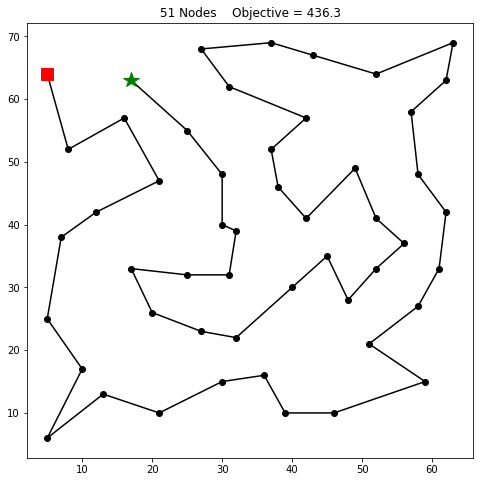

In [243]:
view_tsp(sol,points)

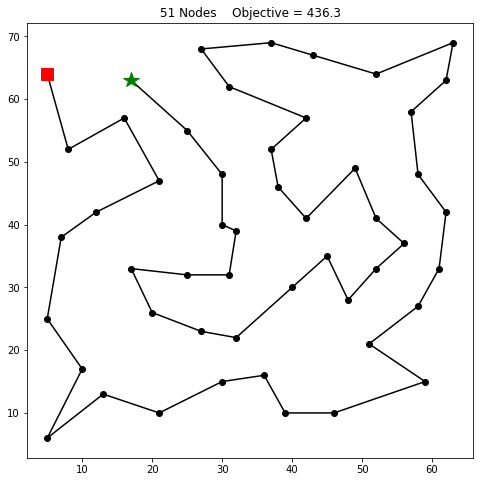

In [246]:
init = np.random.choice(range(node_count),node_count,replace=False)
sol2 = three_opt(sol,points,2)
view_tsp(sol2,points)

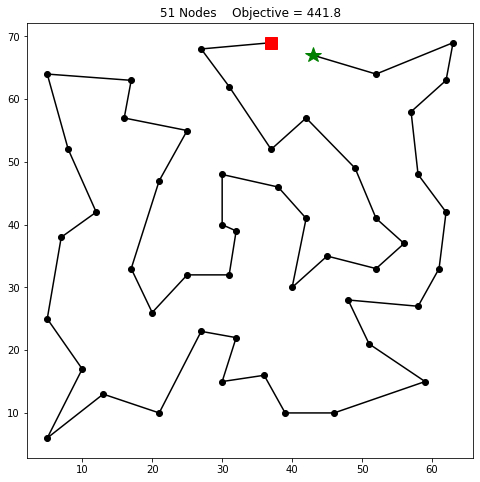

In [244]:
init = np.random.choice(range(node_count),node_count,replace=False)
sol2 = three_opt(list(init),points,2)
view_tsp(sol2,points)

# Filtered Neighbors

In [260]:
from sklearn.neighbors import KDTree
from solver import load_data
import numpy as np
from ortools.sat.python import cp_model

In [487]:
def generate_tsp(node_count, random_state = None):
    np.random.seed(random_state)
    x = np.random.randint(100,size=node_count,dtype=int)
    y = np.random.randint(100,size=node_count,dtype=int)
    points = [Point(i,j) for i,j in zip(x,y)]
    return points

def view_matrix(mat,points,figsize = (8,8)):
    lines = []
#     row = np.argmax(sol_mat,axis=0)
    row = np.arange(len(points))
    col = np.argmax(sol_mat,axis=1)
    plt.figure(figsize=figsize)
    for i,j in zip(row,col):
        x = [points[i].x,points[j].x]
        y = [points[i].y,points[j].y]
        plt.plot(x,y,'ok-')
        
def check_feasibility(sol_mat):
    dest = np.argmax(sol_mat,axis=1)
    return len(set(dest))==sol_mat.shape[0]

def matrix_to_route(matrix):
    assert check_feasibility, 'Invalid input matrix'
    route = [0]
    dest = np.argmax(matrix,axis = 1)
    n = len(dest)
    for i in range(n):
        route.append(dest[route[-1]])
    final = route.pop(-1)
    if final!=0:
        raise Exception('The route is not complete.')
    return route

#Nodes: 51


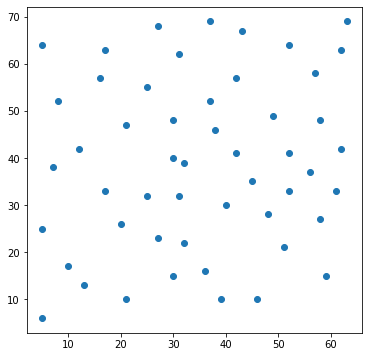

In [488]:
node_count, points = load_data('tsp_51_1')


# node_count=20
# points = generate_tsp(node_count,23)

plt.figure(figsize=(6, 6))
plt.scatter(
    x=[p.x for p in points],
    y=[p.y for p in points],
)

In [504]:
def get_k_value(n):
    '''
    50 nodes --> k = 5
    100 nodes --> k = 8
    '''
    k = 5 + 3*np.log2(n/50)
    return int(k)

In [526]:
def filtered_neighbors(points):
    node_count = len(points)
    
    # Neighbor Detection
    xy = np.array(points)
    kdt = KDTree(xy)
    k = get_k_value(node_count) + 1
    dist, neighbors = kdt.query(xy,k)
    
    # Create CP Model
    model = cp_model.CpModel()
    
    # Define Variables
    a = [] # whether i and j are connected
    u = [] # order of points
    for i in range(node_count):
        row = [model.NewBoolVar(f'a_{i}_{j}') for j in range(node_count)]
        a.append(row)
    u = [model.NewIntVar(0,node_count-1,f'u_{i}') for i in range(node_count)]
    
    # Add Constraints
    for i in range(node_count):
        model.AddAbsEquality(0, a[i][i])
        model.Add(sum([ a[i][j] for j in range(node_count)])==1)
        model.Add(sum([ a[j][i] for j in range(node_count)])==1)
    
    for i in range(node_count-1):
        for j in range(i,node_count):
            model.Add(a[i][j]+a[j][i]<=1)
    
    # Connectivity Constraint
    model.AddAllDifferent(u)
    for i in range(1,node_count):
        for j in range(1,node_count):
            if i==j: continue
            model.Add(u[i]-u[j]+node_count*a[i][j]<=node_count-1)
    model.Add(u[0]==0)
    
    # Proximity Constraint
    for i in range(node_count):
        neigh = neighbors[i,1:]
        for j in range(node_count):
            if j not in neigh:
                model.AddAbsEquality(0,a[i][j])
                model.AddAbsEquality(0,a[j][i])
                
    # Objective
    obj = []
    for i in range(node_count):
        for j in range(node_count):
            d = distance(points[i],points[j])*100
            obj.append(int(d)*a[i][j])
    model.Minimize(sum(obj))
    
    # Solve
    cpsolver = cp_model.CpSolver()
    cpsolver.parameters.max_time_in_seconds = 60.0
    status = cpsolver.Solve(model)
    print(cpsolver.StatusName())
    
    if status == cp_model.MODEL_INVALID or cp_model.INFEASIBLE:
        raise RuntimeError('Unable to find a solution.')
    
    # Extract Solution
    sol_mat = []
    for i in range(node_count):
        row = [cpsolver.Value(a[i][j]) for j in range(node_count)]
        sol_mat.append(row)
    sol_mat = np.array(sol_mat)
    
    # Convert solution to readable format
    sol = matrix_to_route(sol_mat)
    
    return status == cp_model.OPTIMAL, sol

    

In [527]:
filtered_neighbors(points)

OPTIMAL
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0,
 5,
 2,
 28,
 10,
 9,
 45,
 3,
 27,
 41,
 24,
 46,
 8,
 4,
 34,
 23,
 35,
 13,
 7,
 19,
 40,
 18,
 16,
 44,
 14,
 15,
 38,
 50,
 39,
 49,
 17,
 32,
 48,
 22,
 31,
 1,
 25,
 20,
 37,
 21,
 43,
 29,
 42,
 11,
 30,
 12,
 36,
 6,
 26,
 47,
 33]

In [489]:
xy = np.array(points)
kdt = KDTree(xy)

In [490]:
dist, neighbors = kdt.query(xy,6)
neighbors[0]

array([ 0, 33,  5, 32, 22, 48], dtype=int64)

In [507]:
model = cp_model.CpModel()

In [508]:
a = [] # whether i and j are connected
u = [] # order of points
for i in range(node_count):
    row = [model.NewBoolVar(f'a_{i}_{j}') for j in range(node_count)]
    a.append(row)
u = [model.NewIntVar(0,node_count-1,f'u_{i}') for i in range(node_count)]

In [509]:
# Add Constraints
for i in range(node_count):
    model.AddAbsEquality(0, a[i][i])
    model.Add(sum([ a[i][j] for j in range(node_count)])==1)
    model.Add(sum([ a[j][i] for j in range(node_count)])==1)

for i in range(node_count-1):
    for j in range(i,node_count):
        model.Add(a[i][j]+a[j][i]<=1)

# for i in range(node_count-2):
#     for j in range(i,node_count-1):
#         for k in range(j,node_count):
#             model.Add(a[i][j]+a[j][k]+a[k][i]<=2)
#             model.Add(a[j][i]+a[i][k]+a[k][j]<=2)
            
model.AddAllDifferent(u)

for i in range(1,node_count):
    for j in range(1,node_count):
        if i==j: continue
        model.Add(u[i]-u[j]+node_count*a[i][j]<=node_count-1)
model.Add(u[0]==0)
# model.Add(u[-1]==node_count)

In [510]:
for i in range(node_count):
    neigh = neighbors[i,1:]
    for j in range(node_count):
        if j not in neigh:
            model.AddAbsEquality(0,a[i][j])
            model.AddAbsEquality(0,a[j][i])


In [511]:
# Objective
obj = []
for i in range(node_count):
    for j in range(node_count):
        d = distance(points[i],points[j])*100
        obj.append(int(d)*a[i][j])
model.Minimize(sum(obj))

In [512]:
cpsolver = cp_model.CpSolver()
cpsolver.parameters.max_time_in_seconds = 60.0
status = cpsolver.Solve(model)

In [497]:
# STATUS = {
#     cp_model.FEASIBLE: 'FEASIBLE',
#     cp_model.UNKNOWN: 'UNKNOWN',
#     cp_model.MODEL_INVALID: 'MODEL_INVALID',
#     cp_model.INFEASIBLE: 'INFEASIBLE',
#     cp_model.OPTIMAL: 'OPTIMAL',
# }
# STATUS[status]
cpsolver.StatusName()

'OPTIMAL'

In [513]:
sol_mat = []
for i in range(node_count):
    row = [cpsolver.Value(a[i][j]) for j in range(node_count)]
    sol_mat.append(row)
    print(row)
    
sol_mat = np.array(sol_mat)


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [499]:
np.argmax(sol_mat,axis=0)

array([33, 31,  5, 45,  8,  0, 36, 13, 46, 10, 28, 42, 30, 35, 44, 14, 18,
       49, 40,  7, 25, 37, 48, 34, 41,  1,  6,  3,  2, 43, 11, 22, 17, 47,
        4, 23, 12, 20, 15, 50, 19, 27, 29, 21, 16,  9, 24, 26, 32, 39, 38],
      dtype=int64)

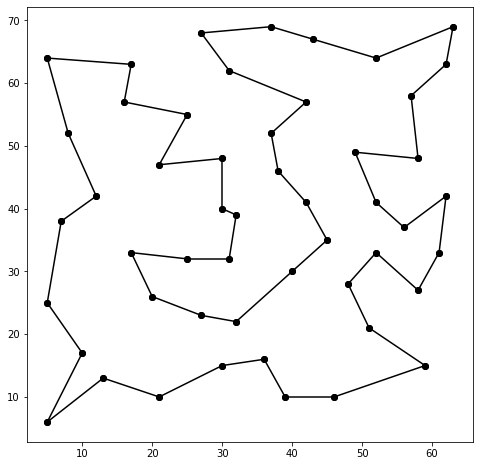

In [514]:
view_matrix(sol_mat,points)

In [515]:
sol = matrix_to_route(sol_mat)

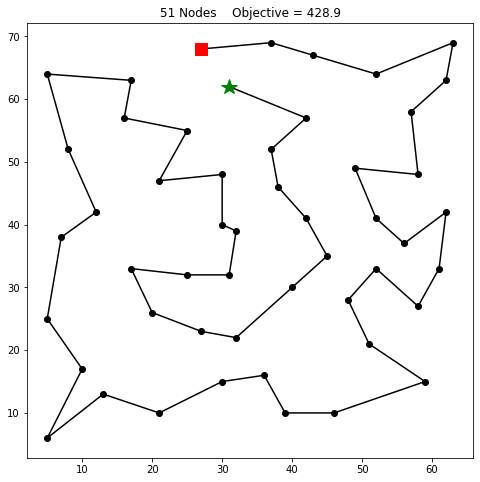

In [516]:
view_tsp(sol,points)

#0001 	428.87175639203394


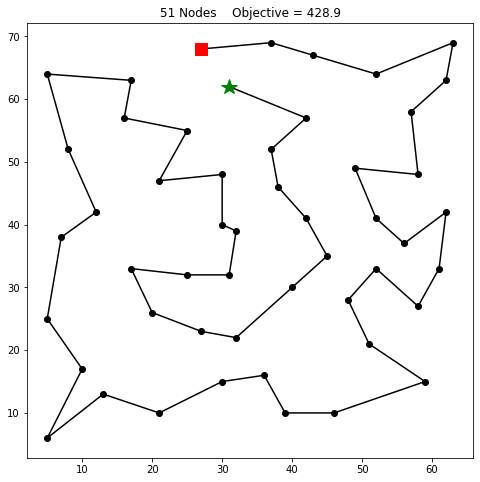

In [503]:
sol2 = two_opt_v2(sol,points)
view_tsp(sol2,points)

# Dantzig–Fulkerson–Johnson formulation
    

In [260]:
from sklearn.neighbors import KDTree
from solver import load_data
import numpy as np
from ortools.sat.python import cp_model

In [487]:
def generate_tsp(node_count, random_state = None):
    np.random.seed(random_state)
    x = np.random.randint(100,size=node_count,dtype=int)
    y = np.random.randint(100,size=node_count,dtype=int)
    points = [Point(i,j) for i,j in zip(x,y)]
    return points

def view_matrix(mat,points,figsize = (8,8)):
    lines = []
#     row = np.argmax(sol_mat,axis=0)
    row = np.arange(len(points))
    col = np.argmax(sol_mat,axis=1)
    plt.figure(figsize=figsize)
    for i,j in zip(row,col):
        x = [points[i].x,points[j].x]
        y = [points[i].y,points[j].y]
        plt.plot(x,y,'ok-')
        
def check_feasibility(sol_mat):
    dest = np.argmax(sol_mat,axis=1)
    return len(set(dest))==sol_mat.shape[0]

def matrix_to_route(matrix):
    assert check_feasibility, 'Invalid input matrix'
    route = [0]
    dest = np.argmax(matrix,axis = 1)
    n = len(dest)
    for i in range(n):
        route.append(dest[route[-1]])
    final = route.pop(-1)
    if final!=0:
        raise Exception('The route is not complete.')
    return route

#Nodes: 51


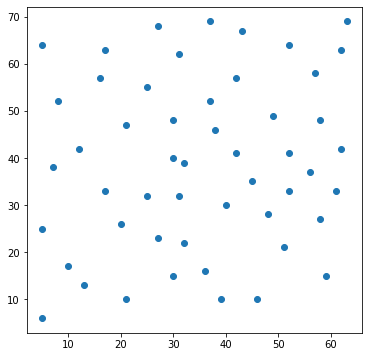

In [488]:
node_count, points = load_data('tsp_51_1')


# node_count=20
# points = generate_tsp(node_count,23)

plt.figure(figsize=(6, 6))
plt.scatter(
    x=[p.x for p in points],
    y=[p.y for p in points],
)

In [504]:
def get_k_value(n):
    '''
    50 nodes --> k = 5
    100 nodes --> k = 8
    '''
    k = 5 + 3*np.log2(n/50)
    return int(k)



In [553]:
def get_subgraph(matrix):
    node_count = matrix.shape[0]
    graph = nx.Graph()
    graph.add_nodes_from(range(node_count))

    p2 = matrix.argmax(axis=1)
    for i, p in enumerate(p2):
        graph.add_edge(i, p)

    sub_graphs = list(nx.connected_components(graph))
    sizes = [len(sg) for sg in sub_graphs]
    sub_graphs.pop(np.argmax(sizes))
    return sub_graphs



<IPython.core.display.Javascript object>

In [565]:
subgraphs = []


<IPython.core.display.Javascript object>

In [582]:
subgraphs.extend(new_subgraphs)

<IPython.core.display.Javascript object>

In [583]:
# def filtered_neighbors(points):

# node_count = len(points)

# Neighbor Detection
xy = np.array(points)
kdt = KDTree(xy)
k = get_k_value(node_count) + 1
dist, neighbors = kdt.query(xy, k)

# Create CP Model
model = cp_model.CpModel()

# Define Variables
a = []  # whether i and j are connected
# u = [] # order of points
for i in range(node_count):
    row = [model.NewBoolVar(f"a_{i}_{j}") for j in range(node_count)]
    a.append(row)
# u = [model.NewIntVar(0,node_count-1,f'u_{i}') for i in range(node_count)]

# Add Constraints
for i in range(node_count):
    model.AddAbsEquality(0, a[i][i])
    model.Add(sum([a[i][j] for j in range(node_count)]) == 1)
    model.Add(sum([a[j][i] for j in range(node_count)]) == 1)

for i in range(node_count - 1):
    for j in range(i, node_count):
        model.Add(a[i][j] + a[j][i] <= 1)

# Connectivity Constraint
# model.AddAllDifferent(u)
# for i in range(1,node_count):
#     for j in range(1,node_count):
#         if i==j: continue
#         model.Add(u[i]-u[j]+node_count*a[i][j]<=node_count-1)
# model.Add(u[0]==0)

# Proximity Constraint
for i in range(node_count):
    neigh = neighbors[i, 1:]
    for j in range(node_count):
        if j not in neigh:
            model.AddAbsEquality(0, a[i][j])
            model.AddAbsEquality(0, a[j][i])

# Remove Subgraphs
for sg in subgraphs:
    subsum = 0
    for i in sg:
        subsum += sum([a[i][j] for j in sg])
    model.Add(subsum <= (len(sg) - 1))

# Objective
obj = []
for i in range(node_count):
    for j in range(node_count):
        d = distance(points[i], points[j]) * 100
        obj.append(int(d) * a[i][j])
model.Minimize(sum(obj))

# Solve
cpsolver = cp_model.CpSolver()
cpsolver.parameters.max_time_in_seconds = 60.0
status = cpsolver.Solve(model)
print(cpsolver.StatusName())

if status == cp_model.MODEL_INVALID or status == cp_model.INFEASIBLE:
    raise RuntimeError("Unable to find a solution.")

# Extract Solution
sol_mat = []
for i in range(node_count):
    row = [cpsolver.Value(a[i][j]) for j in range(node_count)]
    sol_mat.append(row)
sol_mat = np.array(sol_mat)

# Convert solution to readable format
# sol = matrix_to_route(sol_mat)

# return status == cp_model.OPTIMAL, sol

FEASIBLE


<IPython.core.display.Javascript object>

In [581]:
new_subgraphs = get_subgraph(sol_mat)

<IPython.core.display.Javascript object>

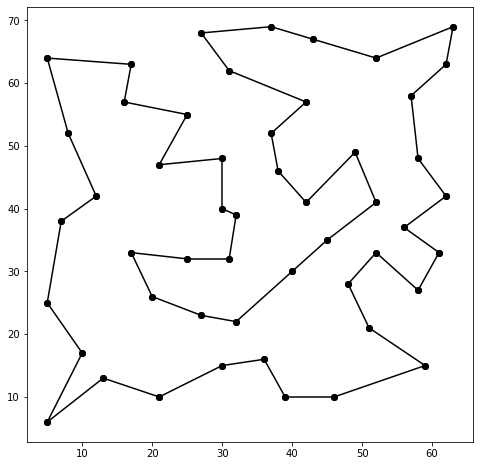

<IPython.core.display.Javascript object>

In [584]:
view_matrix(sol_mat, points)

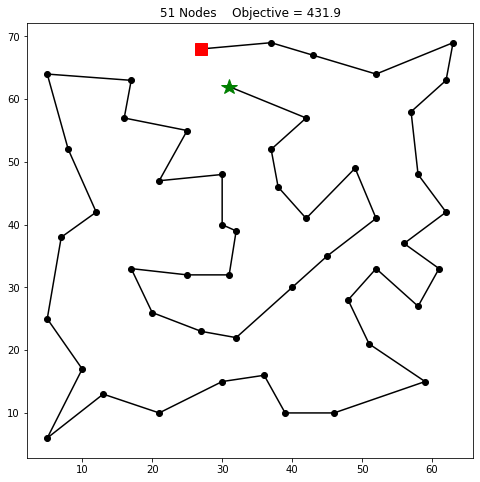

<IPython.core.display.Javascript object>

In [587]:
sol = matrix_to_route(sol_mat)
view_tsp(sol, points)

In [585]:
filtered_neighbors(points)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [489]:
xy = np.array(points)
kdt = KDTree(xy)

In [490]:
dist, neighbors = kdt.query(xy,6)
neighbors[0]

array([ 0, 33,  5, 32, 22, 48], dtype=int64)

In [507]:
model = cp_model.CpModel()

In [508]:
a = [] # whether i and j are connected
u = [] # order of points
for i in range(node_count):
    row = [model.NewBoolVar(f'a_{i}_{j}') for j in range(node_count)]
    a.append(row)
u = [model.NewIntVar(0,node_count-1,f'u_{i}') for i in range(node_count)]

In [509]:
# Add Constraints
for i in range(node_count):
    model.AddAbsEquality(0, a[i][i])
    model.Add(sum([ a[i][j] for j in range(node_count)])==1)
    model.Add(sum([ a[j][i] for j in range(node_count)])==1)

for i in range(node_count-1):
    for j in range(i,node_count):
        model.Add(a[i][j]+a[j][i]<=1)

# for i in range(node_count-2):
#     for j in range(i,node_count-1):
#         for k in range(j,node_count):
#             model.Add(a[i][j]+a[j][k]+a[k][i]<=2)
#             model.Add(a[j][i]+a[i][k]+a[k][j]<=2)
            
model.AddAllDifferent(u)

for i in range(1,node_count):
    for j in range(1,node_count):
        if i==j: continue
        model.Add(u[i]-u[j]+node_count*a[i][j]<=node_count-1)
model.Add(u[0]==0)
# model.Add(u[-1]==node_count)

In [510]:
for i in range(node_count):
    neigh = neighbors[i,1:]
    for j in range(node_count):
        if j not in neigh:
            model.AddAbsEquality(0,a[i][j])
            model.AddAbsEquality(0,a[j][i])


In [511]:
# Objective
obj = []
for i in range(node_count):
    for j in range(node_count):
        d = distance(points[i],points[j])*100
        obj.append(int(d)*a[i][j])
model.Minimize(sum(obj))

In [512]:
cpsolver = cp_model.CpSolver()
cpsolver.parameters.max_time_in_seconds = 60.0
status = cpsolver.Solve(model)

In [497]:
# STATUS = {
#     cp_model.FEASIBLE: 'FEASIBLE',
#     cp_model.UNKNOWN: 'UNKNOWN',
#     cp_model.MODEL_INVALID: 'MODEL_INVALID',
#     cp_model.INFEASIBLE: 'INFEASIBLE',
#     cp_model.OPTIMAL: 'OPTIMAL',
# }
# STATUS[status]
cpsolver.StatusName()

'OPTIMAL'

In [513]:
sol_mat = []
for i in range(node_count):
    row = [cpsolver.Value(a[i][j]) for j in range(node_count)]
    sol_mat.append(row)
    print(row)
    
sol_mat = np.array(sol_mat)


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [499]:
np.argmax(sol_mat,axis=0)

array([33, 31,  5, 45,  8,  0, 36, 13, 46, 10, 28, 42, 30, 35, 44, 14, 18,
       49, 40,  7, 25, 37, 48, 34, 41,  1,  6,  3,  2, 43, 11, 22, 17, 47,
        4, 23, 12, 20, 15, 50, 19, 27, 29, 21, 16,  9, 24, 26, 32, 39, 38],
      dtype=int64)

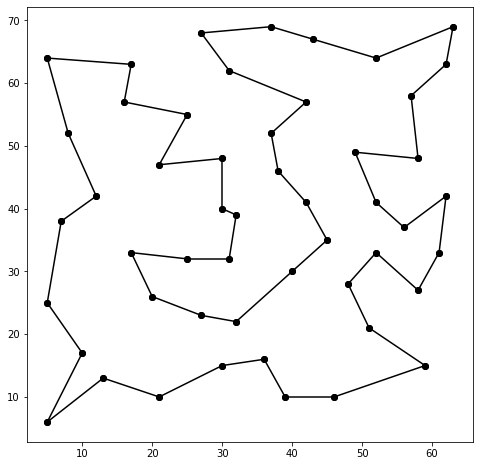

In [514]:
view_matrix(sol_mat,points)

In [515]:
sol = matrix_to_route(sol_mat)

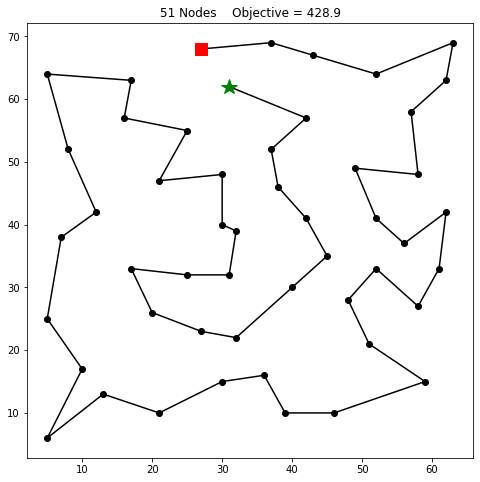

In [516]:
view_tsp(sol,points)

#0001 	428.87175639203394


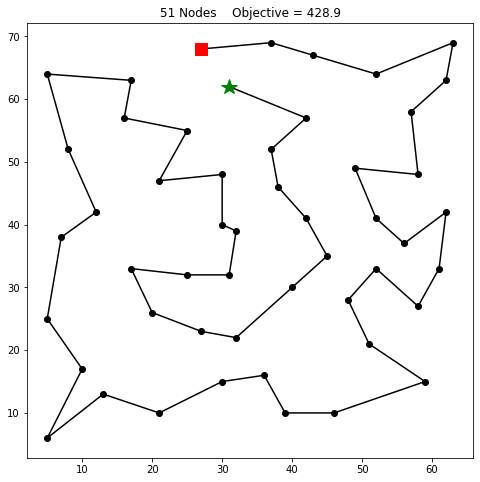

In [503]:
sol2 = two_opt_v2(sol,points)
view_tsp(sol2,points)